In [1]:
# Análisis exploratorio del dataset de películas (TMDB)
Este cuaderno analiza un dataset consolidado de alrededor 1000 películas extraídas de la API de TMDB para los años 1950, 1960, 1970, 1975, 1982, 1990, 1994, 1999, 2001, 2005, 2007, 2012, 2019, 2022 y 2024. El objetivo es explorar sus características

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carga del dataset
df = pd.read_csv("../data/processed/movies_merged.csv")
df.head()

,id,title,original_title,production_countries,overview,tagline,release_date,original_language,genres,runtime,budget,revenue,cast,vote_average,director,keywords
0,41465,Vivir con papá,Life with Father,['United States of America'],"La acción se desarrolla hacia 1880, en el domi...",NaN,1947-09-13,en,"Comedia, Familia",118,0,0,"['William Powell', 'Irene Dunne', 'Elizabeth T...",6.600,Michael Curtiz,"[""family's daily life"", 'broker', 'based on pl..."
1,28297,Fuerza bruta,Brute Force,['United States of America'],Tras los muros de la penitenciaría Westgate im...,¡Imagen llena de energía!,1947-07-16,en,"Crimen, Drama, Suspense",98,0,0,"['Burt Lancaster', 'Hume Cronyn', 'Charles Bic...",7.288,Jules Dassin,"['prison cell', 'prison guard', 'film noir', '..."
2,52844,Sucedió en la 5ª avenida,It Happened on Fifth Avenue,['United States of America'],Un vagabundo neoyorquino se muda a una mansión...,NaN,1947-04-17,en,"Comedia, Romance, Música",116,0,0,"['Don DeFore', 'Ann Harding', 'Charles Ruggles']",7.000,Roy Del Ruth,"['new york city', 'homeless person', 'holiday'..."
3,30308,El asesino poeta,Lured,['United States of America'],Siete bellas jóvenes son encontradas asesinada...,NaN,1947-08-28,en,"Misterio, Crimen, Suspense",109,0,0,"['George Sanders', 'Lucille Ball', 'Charles Co...",6.313,Douglas Sirk,"['london, england', 'undercover', 'poetry', 's..."
4,22356,El ángel y el pistolero,Angel and the Badman,['United States of America'],"Quirt Evans (John Wayne), un pistolero malheri...",NaN,1947-02-15,en,"Western, Romance, Aventura, Acción",100,0,0,"['John Wayne', 'Gail Russell', 'Harry Carey']",6.400,James Edward Grant,"['love at first sight', 'shootout', 'quakerism..."


In [3]:
print("Películas cargadas: ", len(df))
print("\nColumnas disponibles: ", df.columns.tolist(),"\n")
df.info()

Películas cargadas:  25500

Columnas disponibles:  ['id', 'title', 'original_title', 'production_countries', 'overview', 'tagline', 'release_date', 'original_language', 'genres', 'runtime', 'budget', 'revenue', 'cast', 'vote_average', 'director', 'keywords'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25500 non-null  int64  
 1   title                 25500 non-null  object 
 2   original_title        25500 non-null  object 
 3   production_countries  25500 non-null  object 
 4   overview              17572 non-null  object 
 5   tagline               7411 non-null   object 
 6   release_date          25500 non-null  object 
 7   original_language     25500 non-null  object 
 8   genres                24866 non-null  object 
 9   runtime               25500 non-null  int64  
 10  budget       

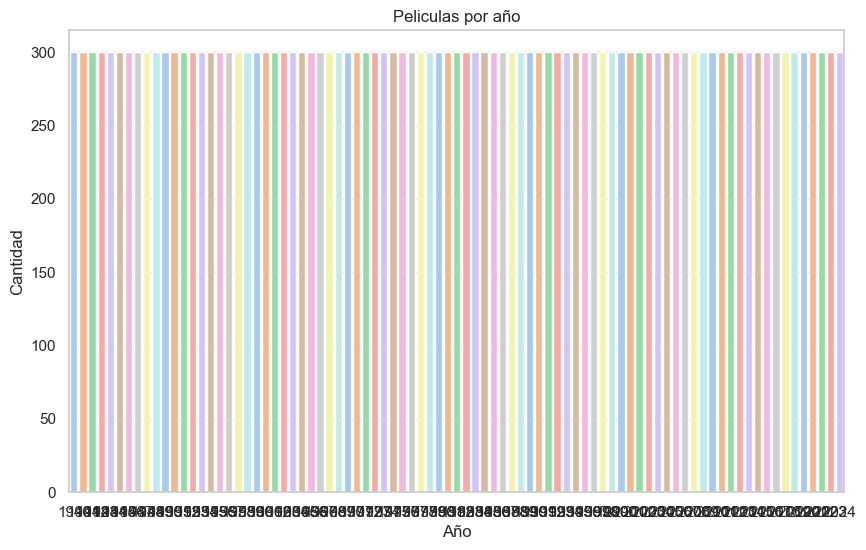

In [4]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

sns.countplot(data=df, x="release_year", hue="release_year", palette="pastel", legend= False)
plt.title("Peliculas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

In [5]:
# Valores faltantes por columna

df.isnull().mean().sort_values(ascending=False)

tagline                 0.709373
overview                0.310902
genres                  0.024863
director                0.002510
budget                  0.000000
keywords                0.000000
vote_average            0.000000
cast                    0.000000
revenue                 0.000000
id                      0.000000
runtime                 0.000000
title                   0.000000
original_language       0.000000
release_date            0.000000
production_countries    0.000000
original_title          0.000000
release_year            0.000000
dtype: float64

In [6]:
# Porcentaje de valores nulos por columna
null_percent = df.isnull().mean().sort_values(ascending=False)*100
null_percent[null_percent > 0].round(2)

tagline     70.94
overview    31.09
genres       2.49
director     0.25
dtype: float64

In [18]:
**Nota**: Hay valores ausentes en tagline, overview, genres y director. Evaluaremos más adelante si rellenarlos, eliminarlos o ignorarlos en el entrenamiento.

SyntaxError: invalid syntax (3373989955.py, line 1)

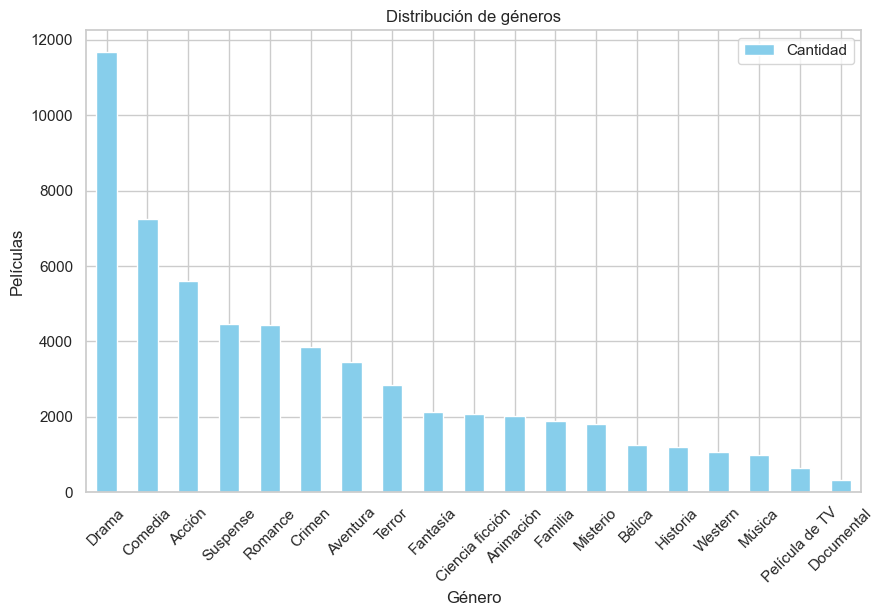

In [7]:
# Distribución de géneros

from collections import Counter
import ast

all_genres = []
for entry in df["genres"].dropna():
    genres = [g.strip() for g in entry.split(",")]
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
pd.DataFrame(genre_counts.most_common(), columns=["Género", "Cantidad"]).set_index("Género").plot(kind="bar", color="skyblue")
plt.title("Distribución de géneros")
plt.ylabel("Películas")
plt.xticks(rotation=45)
plt.show()

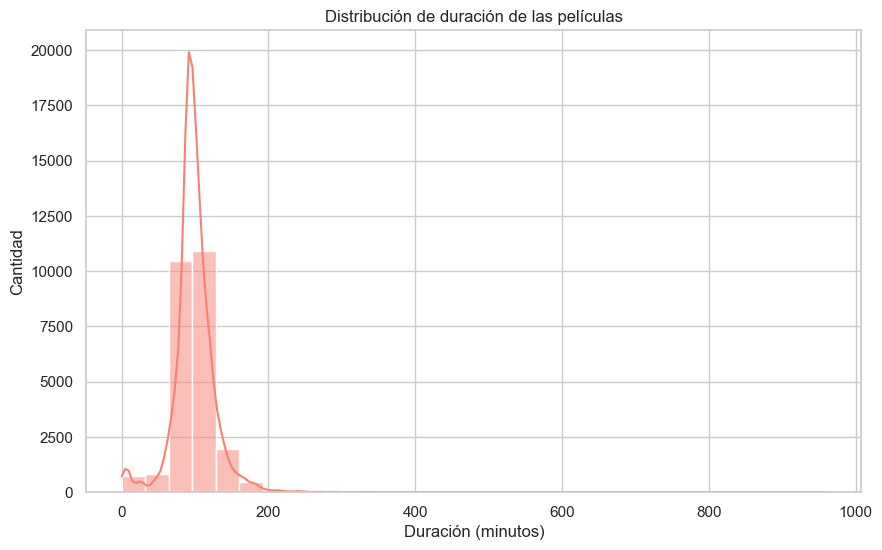

In [8]:
# Duración de las películas

sns.histplot(df["runtime"].dropna(), bins=30, kde=True, color="salmon")
plt.title("Distribución de duración de las películas")
plt.xlabel("Duración (minutos)")
plt.ylabel("Cantidad")
plt.show()

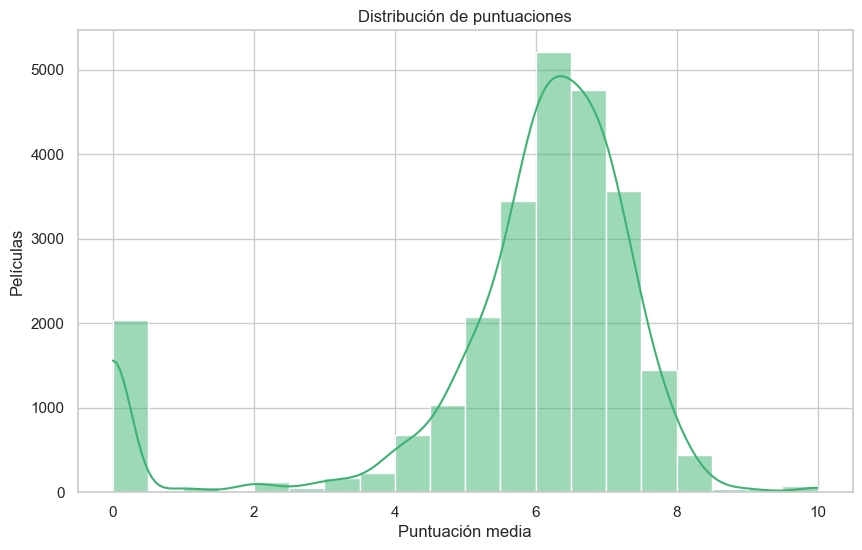

In [9]:
# Puntuaciones

sns.histplot(df["vote_average"], bins=20, kde= True, color="mediumseagreen")
plt.title("Distribución de puntuaciones")
plt.xlabel("Puntuación media")
plt.ylabel("Películas")
plt.show()

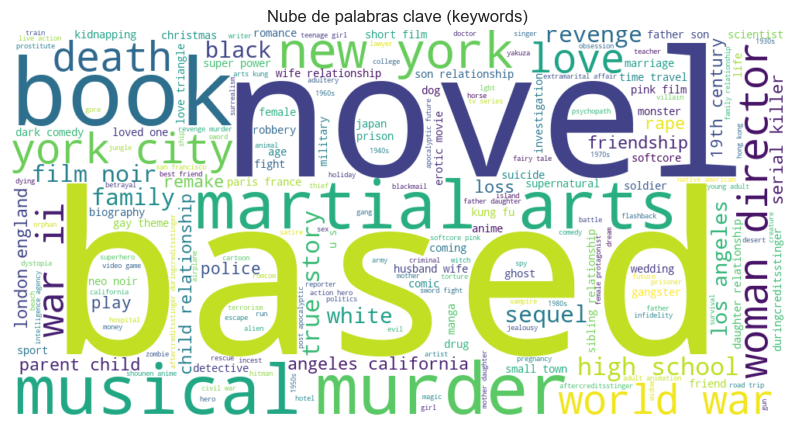

In [11]:
# Exploración de palabras clave

from wordcloud import WordCloud

keywords = []
for entry in df["keywords"].dropna():
    try:
        kws = ast.literal_eval(entry)
        keywords.extend(kws)
    except:
        continue

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(" ".join(keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras clave (keywords)")
plt.show()

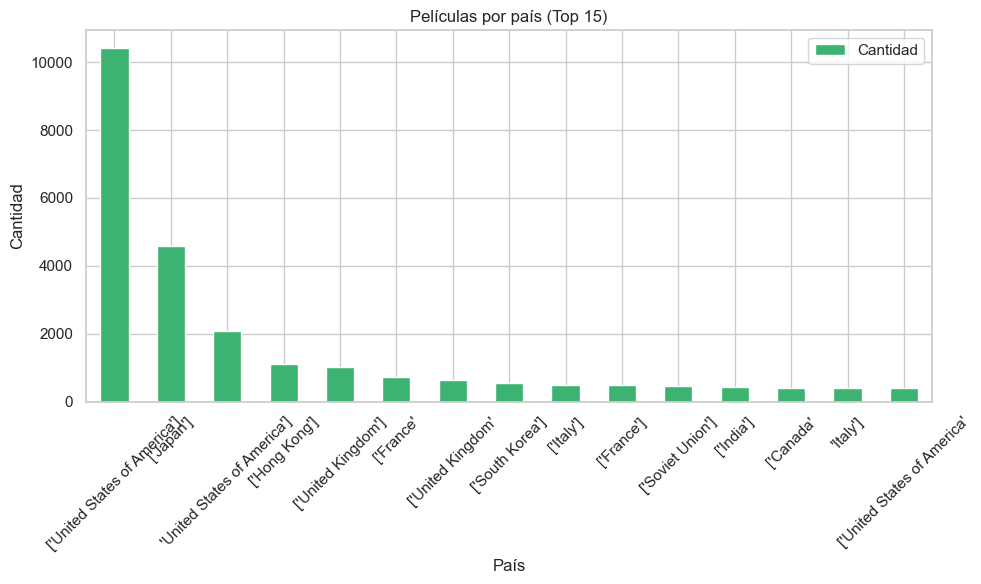

In [12]:
# Conteo por países

all_countries = []
for entry in df["production_countries"].dropna():
    countries = [c.strip() for c in entry.split(",")]
    all_countries.extend(countries)

country_counts = Counter(all_countries)

top_countries = country_counts.most_common(15)

# Graficar
pd.DataFrame(top_countries, columns=["País", "Cantidad"]).set_index("País").plot(
    kind="bar", color="mediumseagreen"
)

plt.title("Películas por país (Top 15)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
paises_unicos = set()

for entry in df["production_countries"].dropna():
    for pais in entry.split(","):
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

["'Afghanistan'", "'Algeria']", "'Argentina'", "'Argentina']", "'Australia'", "'Australia']", "'Austria'", "'Austria']", "'Bahamas'", "'Barbados']", "'Belarus']", "'Belgium'", "'Belgium']", "'Botswana']", "'Brazil'", "'Brazil']", "'Bulgaria'", "'Bulgaria']", "'Cameroon'", "'Canada'", "'Canada']", "'Chile'", "'Chile']", "'China'", "'China']", "'Colombia'", "'Colombia']", "'Cuba']", "'Cyprus']", "'Czech Republic'", "'Czech Republic']", "'Czechoslovakia'", "'Denmark'", "'Denmark']", "'Dominican Republic'", "'East Germany'", "'East Germany']", "'Ecuador'", "'Egypt']", "'Estonia'", "'Faeroe Islands']", "'Finland'", "'Finland']", "'France'", "'France']", "'Georgia']", "'Germany'", "'Germany']", "'Greece'", "'Greece']", "'Guadaloupe'", "'Hong Kong'", "'Hong Kong']", "'Hungary'", "'Hungary']", "'Iceland'", "'Iceland']", "'India'", "'India']", "'Iran'", "'Iran']", "'Iraq']", "'Ireland'", "'Ireland']", "'Israel'", "'Israel']", "'Italy'", "'Italy']", "'Japan'", "'Japan']", "'Kazakhstan'", "'Kenya

In [ ]:
**Nota**: Los países están mal formateados, y eso provoca repeticiones. 

In [14]:
# Nombres de director

directores = df['director'].value_counts(dropna=False)
print(directores)

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
Chang Cheh           71
NaN                  64
Masahiro Makino      55
Sadatsugu Matsuda    52
Kinji Fukasaku       49
                     ..
Ali Selim             1
David Steiman         1
Matías Bize           1
Shaun Monson          1
Tsui Siu-Ming         1
Name: count, Length: 8195, dtype: int64
['A. Bhimsingh', 'A. Edward Sutherland', 'A. V. Meiyappan', 'A.B. Stone', 'A.R. Murugadoss', 'Aamir Khan', 'Aaron Blaise', 'Aaron Harvey', 'Aaron Horvath', 'Aaron Huggett', 'Aaron Kim', 'Aaron Lipstadt', 'Aaron Mirtes', 'Aaron Moorhead', 'Aaron Nee', 'Aaron Norris', 'Aaron Schneider', 'Aaron Seltzer', 'Aaron Sorkin', 'Abbas Alibhai Burmawalla', 'Abbas Kamel', 'Abbas Kiarostami', 'Abbo Q. Dela Cruz', 'Abby Berlin', 'Abby Kohn', 'Abdellatif Kechiche', 'Abe Levitow', 'Abel Ferrara', 'Abel Gance', 'Abel Salazar', 'Abhishek Pathak', 'Abhishek Varman', 'Abner Biberman', 'Abraham Polonsky', 'Abram Room', 'Acharya Atre', 'Adam Bhala Lough', 'Adam Brooks', 'Adam Elliot', 'Adam Green', 'A

In [ ]:
**Nota**: Algunos nombres, muy pocos, están repetidos o mal escritos.  

In [36]:
# Conclusiones finales del análisis

- El dataset contiene **4500 películas** con metadatos relevantes como géneros, reparto, país, duración, ingresos y keywords.
- Hay una buena representación de varias décadas.
- Existen algunas columnas con valores nulos.
- Los países están mal formateados.    
- Los géneros más comunes son Drama, Comedia, Acción, Suspense y Crimen.
- Las notas media se concrentran entre 4 y 8.
- La duración de las películas varía ampliamente, destacando los 90 minutos.
- Es necesario algún ajuste en los nombres de los directores    
- Tras el análisis de palabras clave podemos determinar que destacan las palículas basadas en libros.    

Con esto podremos diseñar un modelo de recomendación personalizado.    

SyntaxError: invalid syntax (3516245329.py, line 3)